<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [1]:
import taiko as tk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
df = pd.read_csv('../data/taiko_tables/taiko_result.csv')
df[df['song_id'] == 1]

,drummer_id,song_id,performance_order,score,perfect,good,miss,max_combo,total_stream
0,1,1,1,243400,74,18,2,65,67
1,1,1,2,223010,70,21,3,54,66
2,1,1,3,181870,66,25,3,45,67
13,2,1,1,210550,76,9,1,66,57
14,2,1,2,251930,70,16,0,86,53
15,2,1,3,223700,69,16,1,76,62
26,3,1,1,110320,55,26,5,28,51
27,3,1,2,122580,58,24,4,28,53
28,3,1,3,112370,45,35,6,42,50
39,4,1,1,222600,70,14,2,72,68


pearson = 0.810634


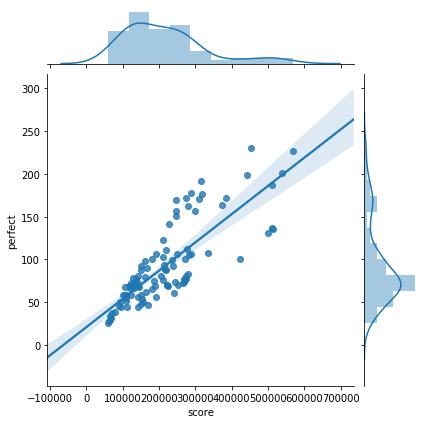

pearson = -0.347051


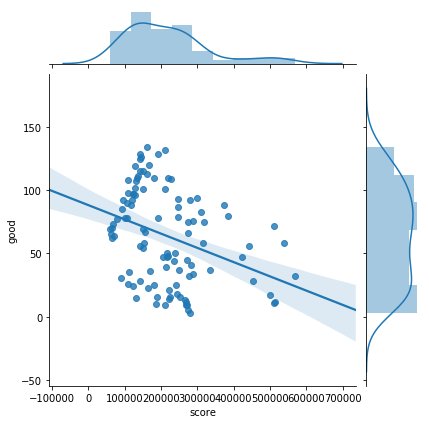

pearson = -0.657183


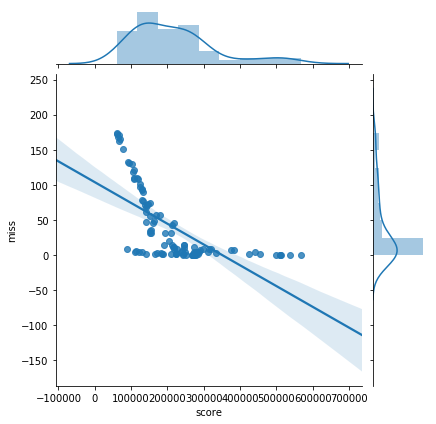

pearson = 0.939404


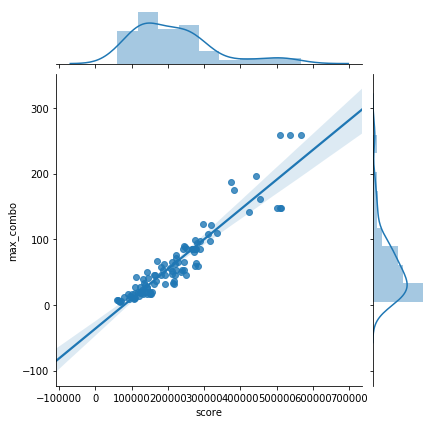

pearson = 0.693341


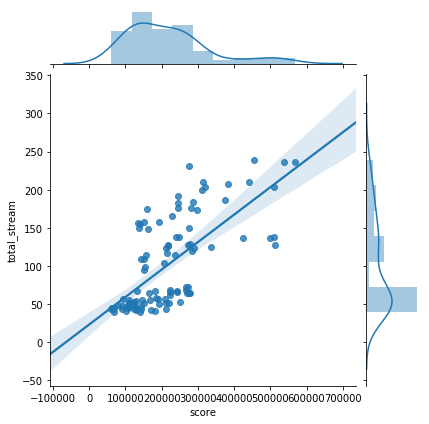

In [3]:
COLS = ['perfect', 'good', 'miss', 'max_combo', 'total_stream']
for col in COLS:
    sns.jointplot(x='score', y=col, data=df, kind="reg")
    print('pearson = %2f' % df['score'].corr(df[col]))
    plt.show()

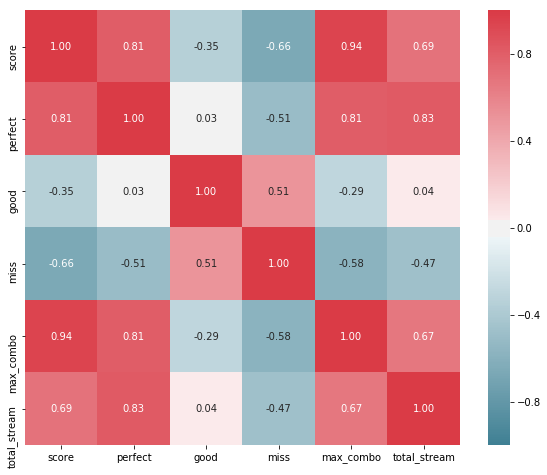

In [4]:
corr = df[['score'] + COLS].corr()

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, vmin=-1, vmax=1, annot=True, fmt=".2f")
plt.show()

In [5]:
result_df = pd.read_csv('CSV/song1_result-yy.csv')
dff = result_df
ming_df = dff[(dff['train_who'] == dff['test_who'])
             & (dff['train_who'] == dff['valid_who'])]
ming_df

,train_who,train_porder,train_score,valid_who,valid_porder,valid_score,test_who,test_porder,test_score,f1_score
0,1,1,243400,1,1,243400,1,1,243400,1.0000
1,1,1,243400,1,1,243400,1,2,223010,0.9331
2,1,1,243400,1,1,243400,1,3,181870,0.9102
24,1,1,243400,1,2,223010,1,1,243400,1.0000
25,1,1,243400,1,2,223010,1,2,223010,0.9554
26,1,1,243400,1,2,223010,1,3,181870,0.9356
48,1,1,243400,1,3,181870,1,1,243400,1.0000
49,1,1,243400,1,3,181870,1,2,223010,0.9499
50,1,1,243400,1,3,181870,1,3,181870,0.9384
576,1,2,223010,1,1,243400,1,1,243400,0.9389


In [6]:
ming_mod_df = ming_df.groupby(['test_who', 'test_porder']).mean().reset_index()
ming_mod_df = ming_mod_df[['test_who', 'test_porder', 'test_score', 'f1_score']]
ming_mod_df.rename(index=str, columns={"test_who": "drummer_id", "test_porder": "performance_order"}, inplace=True)
go_df = ming_mod_df.merge(df[df['song_id'] == 1], on=['drummer_id', 'performance_order'])
go_df

,drummer_id,performance_order,test_score,f1_score,song_id,score,perfect,good,miss,max_combo,total_stream
0,1,1,243400.0,0.953033,1,243400,74,18,2,65,67
1,1,2,223010.0,0.961956,1,223010,70,21,3,54,66
2,1,3,181870.0,0.957433,1,181870,66,25,3,45,67
3,2,1,210550.0,0.972611,1,210550,76,9,1,66,57
4,2,2,251930.0,0.919811,1,251930,70,16,0,86,53
5,2,3,223700.0,0.964289,1,223700,69,16,1,76,62
6,3,1,110320.0,0.965467,1,110320,55,26,5,28,51
7,3,2,122580.0,0.984533,1,122580,58,24,4,28,53
8,3,3,112370.0,0.983033,1,112370,45,35,6,42,50
9,4,1,222600.0,0.883500,1,222600,70,14,2,72,68


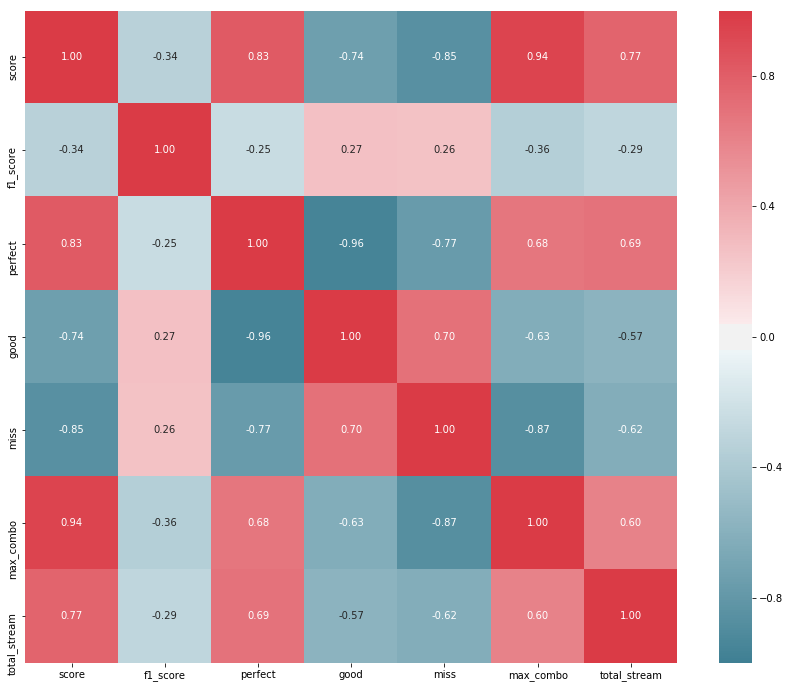

In [7]:
corr = go_df[['score', 'f1_score'] + COLS].corr()

f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, vmin=-1, vmax=1, annot=True, fmt=".2f")
plt.show()

In [8]:
ming_df.drop(['valid_who', 'valid_porder', 'valid_score', 'train_score', 'test_score'], axis=1, inplace=True)
ming_df = ming_df.groupby(['train_who', 'train_porder', 'test_who', 'test_porder']).mean().reset_index().copy()
ming_df

/usr/bin/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,train_who,train_porder,test_who,test_porder,f1_score
0,1,1,1,1,1.000000
1,1,1,1,2,0.946133
2,1,1,1,3,0.928067
3,1,2,1,1,0.939067
4,1,2,1,2,0.998133
5,1,2,1,3,0.944233
6,1,3,1,1,0.920033
7,1,3,1,2,0.941600
8,1,3,1,3,1.000000
9,2,1,2,1,1.000000


In [9]:
def my_transform_score(row):
    train_df = df[(df['drummer_id'] == int(row['train_who']))
                  & (df['performance_order'] == int(row['train_porder']))
                  & (df['song_id'] == 1)]
    test_df = df[(df['drummer_id'] == int(row['test_who']))
                 & (df['performance_order'] == int(row['test_porder']))
                 & (df['song_id'] == 1)]
    return train_df['score'].iloc[0] - test_df['score'].iloc[0]


def my_transform_perfect(row):
    train_df = df[(df['drummer_id'] == int(row['train_who']))
                  & (df['performance_order'] == int(row['train_porder']))
                  & (df['song_id'] == 1)]
    test_df = df[(df['drummer_id'] == int(row['test_who']))
                 & (df['performance_order'] == int(row['test_porder']))
                 & (df['song_id'] == 1)]
    return train_df['perfect'].iloc[0] - test_df['perfect'].iloc[0]


def my_transform_good(row):
    train_df = df[(df['drummer_id'] == int(row['train_who']))
                  & (df['performance_order'] == int(row['train_porder']))
                  & (df['song_id'] == 1)]
    test_df = df[(df['drummer_id'] == int(row['test_who']))
                 & (df['performance_order'] == int(row['test_porder']))
                 & (df['song_id'] == 1)]
    return train_df['good'].iloc[0] - test_df['good'].iloc[0]


def my_transform_miss(row):
    train_df = df[(df['drummer_id'] == int(row['train_who']))
                  & (df['performance_order'] == int(row['train_porder']))
                  & (df['song_id'] == 1)]
    test_df = df[(df['drummer_id'] == int(row['test_who']))
                 & (df['performance_order'] == int(row['test_porder']))
                 & (df['song_id'] == 1)]
    return train_df['miss'].iloc[0] - test_df['miss'].iloc[0]


def my_transform_max_combo(row):
    train_df = df[(df['drummer_id'] == int(row['train_who']))
                  & (df['performance_order'] == int(row['train_porder']))
                  & (df['song_id'] == 1)]
    test_df = df[(df['drummer_id'] == int(row['test_who']))
                 & (df['performance_order'] == int(row['test_porder']))
                 & (df['song_id'] == 1)]
    return train_df['max_combo'].iloc[0] - test_df['max_combo'].iloc[0]


def my_transform_total_stream(row):
    train_df = df[(df['drummer_id'] == int(row['train_who']))
                  & (df['performance_order'] == int(row['train_porder']))
                  & (df['song_id'] == 1)]
    test_df = df[(df['drummer_id'] == int(row['test_who']))
                 & (df['performance_order'] == int(row['test_porder']))
                 & (df['song_id'] == 1)]
    return train_df['total_stream'].iloc[0] - test_df['total_stream'].iloc[0]


MY_TRANSFORM = [my_transform_score, my_transform_perfect, my_transform_good,
                my_transform_miss, my_transform_max_combo, my_transform_total_stream]

MY_COLS = ['score', 'perfect', 'good', 'miss', 'max_combo', 'total_stream']

In [10]:
for i in range(len(MY_TRANSFORM)):
    result_df[MY_COLS[i] + '_dif'] = ming_df.apply(MY_TRANSFORM[i], axis=1)
result_df

,train_who,train_porder,train_score,valid_who,valid_porder,valid_score,test_who,test_porder,test_score,f1_score,score_dif,perfect_dif,good_dif,miss_dif,max_combo_dif,total_stream_dif
0,1,1,243400,1,1,243400,1,1,243400,1.0000,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,243400,1,1,243400,1,2,223010,0.9331,20390.0,4.0,-3.0,-1.0,11.0,1.0
2,1,1,243400,1,1,243400,1,3,181870,0.9102,61530.0,8.0,-7.0,-1.0,20.0,0.0
3,1,1,243400,1,1,243400,2,1,210550,0.7416,-20390.0,-4.0,3.0,1.0,-11.0,-1.0
4,1,1,243400,1,1,243400,2,2,251930,0.7633,0.0,0.0,0.0,0.0,0.0,0.0
5,1,1,243400,1,1,243400,2,3,223700,0.7363,41140.0,4.0,-4.0,0.0,9.0,-1.0
6,1,1,243400,1,1,243400,3,1,110320,0.9143,-61530.0,-8.0,7.0,1.0,-20.0,0.0
7,1,1,243400,1,1,243400,3,2,122580,0.8861,-41140.0,-4.0,4.0,0.0,-9.0,1.0
8,1,1,243400,1,1,243400,3,3,112370,0.8884,0.0,0.0,0.0,0.0,0.0,0.0
9,1,1,243400,1,1,243400,4,1,222600,0.8057,0.0,0.0,0.0,0.0,0.0,0.0


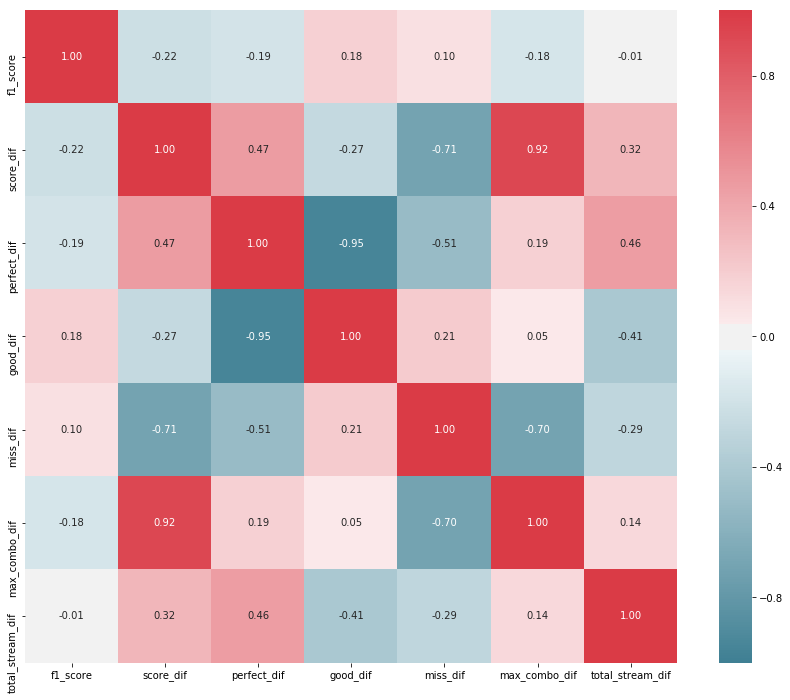

In [11]:
corr = result_df[['f1_score'] + [s + '_dif' for s in MY_COLS]].corr()

f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, vmin=-1, vmax=1, annot=True, fmt=".2f")
plt.show()